In [266]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../src'))

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

# import kamino.seafloor_weathering.chili.plot_example

from kamino.seafloor_weathering.weathering import *
from kamino.constants import YR

In [267]:
cmap='turbo'
vmin_log = -4.5
vmax_log = 1.5

In [268]:
def get_t_rock(rate):
    return 50e6 * rate ** -1

def get_fluid_flux(rate):
    return 0.05 * rate

def get_fluid_path_legth(rate):
    return 100 # * rate ** -1

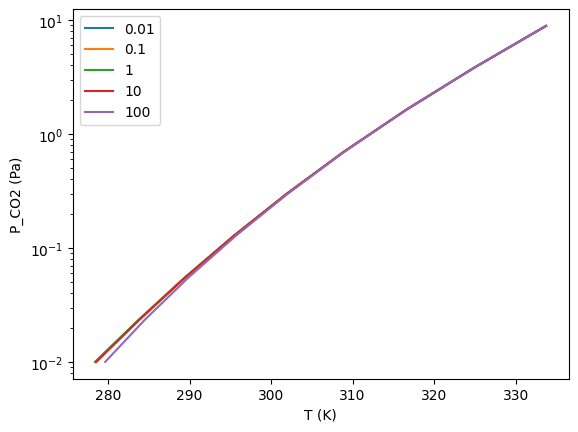

In [269]:
pco2_range = np.logspace(-2, 5, num=20)

def residual(rate, T, pco2):
    return get_Dw(10, T, pco2 / 1e5, get_fluid_path_legth(rate), get_t_rock(rate)) - get_fluid_flux(rate)

rates = [0.01, 0.1, 1, 10, 100]

for i_r, r in enumerate(rates):

    T_range = np.zeros_like(pco2_range)

    for i_p, pco2 in enumerate(pco2_range):

        target = lambda T: residual(r, T, pco2)

        try:
            sol = bisect(target, 274, 340)
            # print(sol)
            T_range[i_p] = sol
        except ValueError:
            T_range[i_p] = np.nan
    
    plt.plot(T_range, pco2_range, label=f'{r}')

plt.legend()
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

In [270]:
T_range = np.linspace(274, 340, num=20)
pco2_range = np.logspace(-2, 5, num=20)

k_eff = np.zeros((20, 20))
C_eq = np.zeros((20, 20))
Dw = np.zeros((20, 20))

w_k = np.zeros((20, 20))
w_t = np.zeros((20, 20))

for i, T in enumerate(T_range):
    for j, pco2 in enumerate(pco2_range):
        
        P = 1e5
        x_CO2 = pco2 / P
        P = float(P / 1e5) # convert to bar
        P = np.clip(P, pr.P.min(), pr.P.max())
        x_CO2 = np.clip(x_CO2, pr.xCO2.min(), pr.xCO2.max())
        T = np.clip(T, pr.T.min(), pr.T.max())

        C_eq[j, i] = get_C_eq(10, T, x_CO2)
        k_eff[j, i] = get_k_eff(10, T, x_CO2)

        Dw[j, i] = get_Dw(10, T, x_CO2, 100, 0)
        w_k[j, i] = w_kinetic(10, T, x_CO2, 100, 0)
        w_t[j, i] = w_thermodynamic(10, T, x_CO2, 0.05)

/tmp/ipykernel_3610350/511746367.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  C_eq[j, i] = get_C_eq(10, T, x_CO2)
/tmp/ipykernel_3610350/511746367.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  k_eff[j, i] = get_k_eff(10, T, x_CO2)
/tmp/ipykernel_3610350/511746367.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Dw[j, i] = get_Dw(10, T, x_CO2, 100, 0)
/tmp/ipykernel_3610350/511746367.py:25: DeprecationWarning: Conversion of an array with ndim > 0 

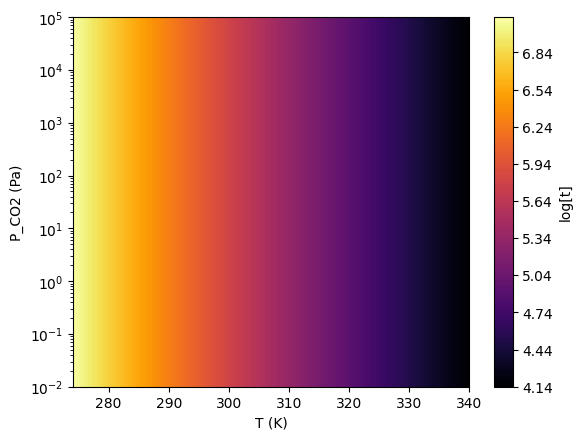

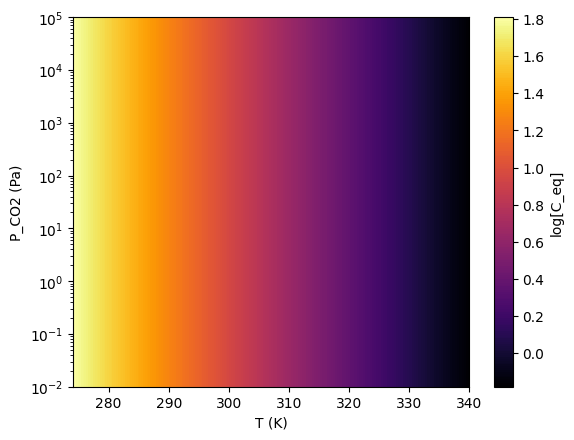

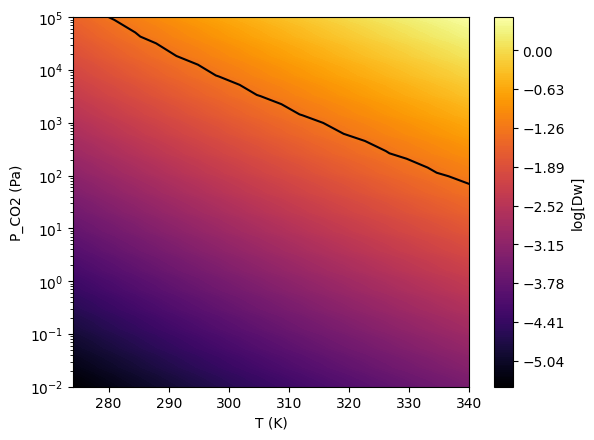

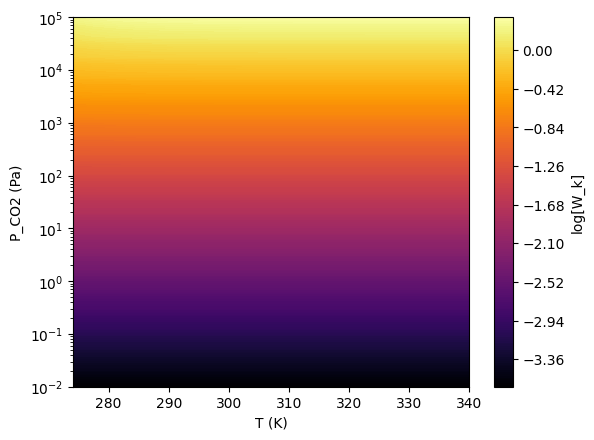

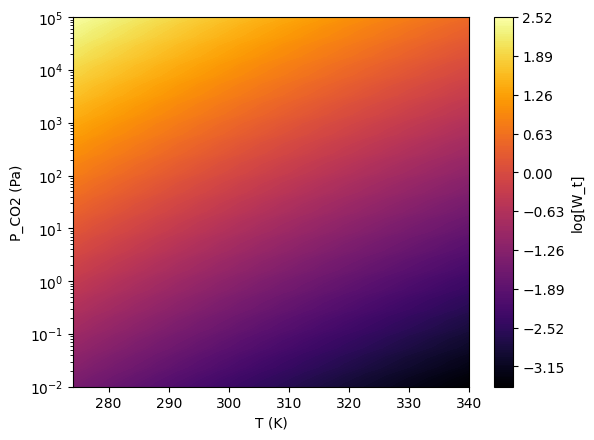

In [ ]:
plt.contourf(T_range, pco2_range, np.log10(1 / (k_eff * 100 * 0.216)), 200, cmap='inferno')
plt.colorbar(label='log[t]')
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

plt.contourf(T_range, pco2_range, np.log10(C_eq), 200, cmap='inferno')
plt.colorbar(label='log[C_eq]')
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

plt.contourf(T_range, pco2_range, np.log10(Dw), 200, cmap='inferno')
plt.colorbar(label='log[Dw]')
plt.contour(T_range, pco2_range, np.log10(Dw), [np.log10(0.05)], cmap='inferno')
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

plt.contourf(T_range, pco2_range, np.log10(w_k), 200, cmap='inferno')
plt.colorbar(label='log[W_k]')
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

plt.contourf(T_range, pco2_range, np.log10(w_t), 200, cmap='inferno')
plt.colorbar(label='log[W_t]')
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

In [272]:
T_range = np.linspace(274, 340, num=20)
pco2 = 1e4
rate_range = np.logspace(-2, 2, num=20)

k_eff = np.zeros((20, 20))
C_eq = np.zeros((20, 20))
Dw = np.zeros((20, 20))

w_k = np.zeros((20, 20))
w_t = np.zeros((20, 20))
w = np.zeros((20, 20))

for i, T in enumerate(T_range):
    for j, rate in enumerate(rate_range):

        t_rock = get_t_rock(rate)
        L = 100
        q = get_fluid_flux(rate)
        
        P = 1e5
        x_CO2 = 280e-6
        P = float(P / 1e5) # convert to bar
        P = np.clip(P, pr.P.min(), pr.P.max())
        x_CO2 = np.clip(x_CO2, pr.xCO2.min(), pr.xCO2.max())
        T = np.clip(T, pr.T.min(), pr.T.max())

        C_eq[j, i] = get_C_eq(10, T, x_CO2)
        k_eff[j, i] = get_k_eff(10, T, x_CO2)

        Dw[j, i] = get_Dw(10, T, x_CO2, L, t_rock)
        w_k[j, i] = w_kinetic(10, T, x_CO2, L, t_rock)
        w_t[j, i] = w_thermodynamic(10, T, x_CO2, q)
        w[j, i] = get_weathering_rate(10, T, x_CO2, q, L, t_rock)

/tmp/ipykernel_3610350/3428259749.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  C_eq[j, i] = get_C_eq(10, T, x_CO2)
/tmp/ipykernel_3610350/3428259749.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  k_eff[j, i] = get_k_eff(10, T, x_CO2)
/tmp/ipykernel_3610350/3428259749.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Dw[j, i] = get_Dw(10, T, x_CO2, L, t_rock)
/tmp/ipykernel_3610350/3428259749.py:31: DeprecationWarning: Conversion of an array with nd

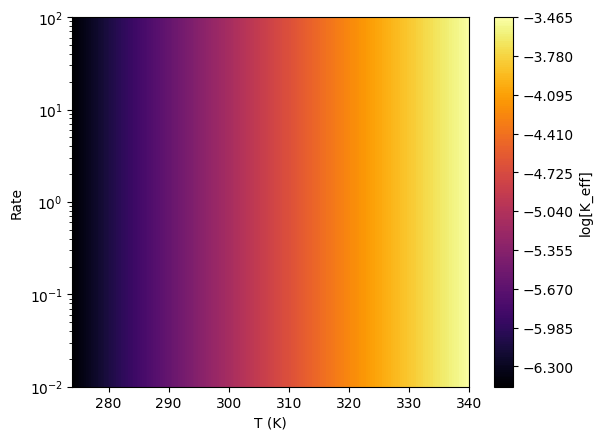

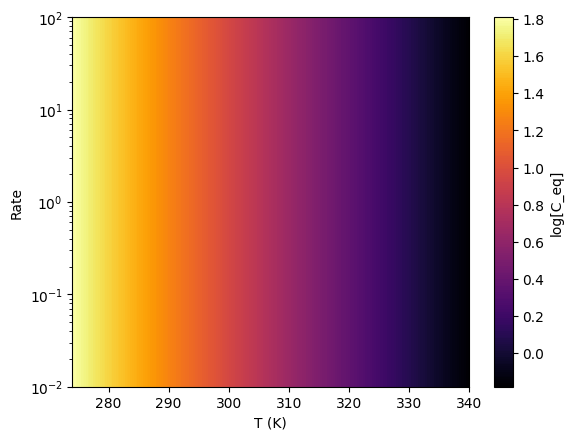

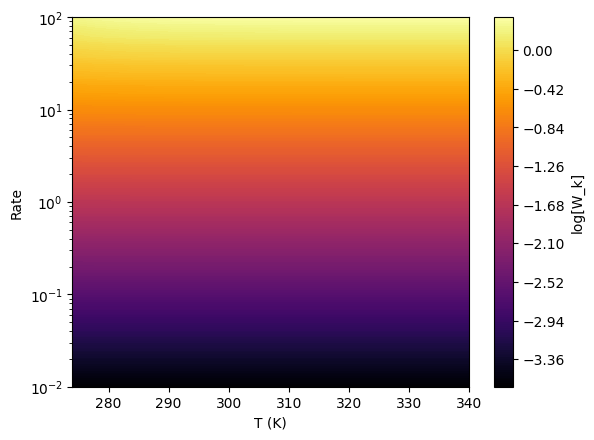

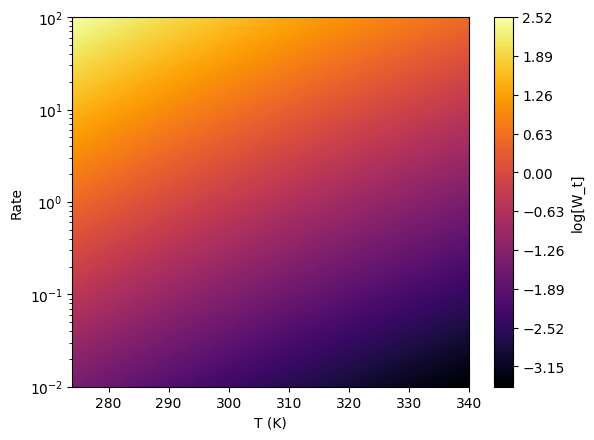

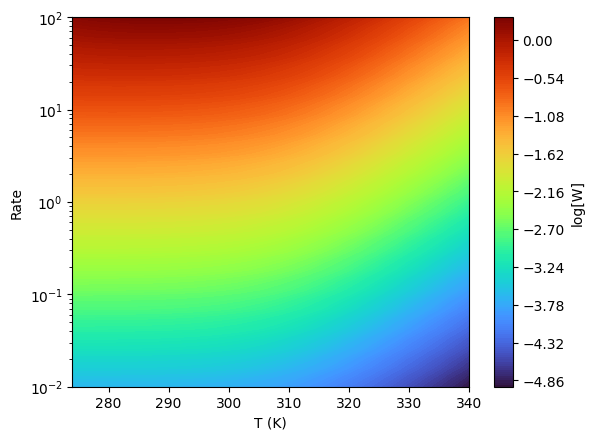

In [ ]:
plt.contourf(T_range, rate_range, np.log10(k_eff) * 100, 200, cmap='inferno')
plt.colorbar(label='log[K_eff]')
plt.xlabel('T (K)')
plt.ylabel('Rate')
plt.yscale('log')
plt.show()

plt.contourf(T_range, rate_range, np.log10(C_eq), 200, cmap='inferno')
plt.colorbar(label='log[C_eq]')
plt.xlabel('T (K)')
plt.ylabel('Rate')
plt.yscale('log')
plt.show()

plt.contourf(T_range, rate_range, np.log10(w_k), 200, cmap='inferno')
plt.colorbar(label='log[W_k]')
plt.xlabel('T (K)')
plt.ylabel('Rate')
plt.yscale('log')
plt.show()

plt.contourf(T_range, rate_range, np.log10(w_t), 200, cmap='inferno')
plt.colorbar(label='log[W_t]')
plt.xlabel('T (K)')
plt.ylabel('Rate')
plt.yscale('log')
plt.show()

plt.contourf(T_range, rate_range, np.log10(w), 200, cmap='turbo')
plt.colorbar(label='log[W]')
plt.xlabel('T (K)')
plt.ylabel('Rate')
plt.yscale('log')
plt.show()

In [280]:
T_range = np.linspace(274, 340, num=20)
pco2_range = np.logspace(-2, 5, num=20)
W_H21_1 = np.zeros((20,20))
W_H21_2 = np.zeros((20,20))
W_H21_3 = np.zeros((20,20))
W_WHAK = np.zeros((20,20))


for i, T in enumerate(T_range):
    for j, pco2 in enumerate(pco2_range):
        r=0.1
        W_H21_1[i, j] = get_weathering_rate(1e6, T, pco2 / 1e5, get_fluid_flux(r), get_fluid_path_legth(r), get_t_rock(r))
        r=1
        W_H21_2[i, j] = get_weathering_rate(1e6, T, pco2 / 1e5, get_fluid_flux(r), get_fluid_path_legth(r), get_t_rock(r))
        r=10
        W_H21_3[i, j] = get_weathering_rate(1e6, T, pco2 / 1e5, get_fluid_flux(r), get_fluid_path_legth(r), get_t_rock(r))

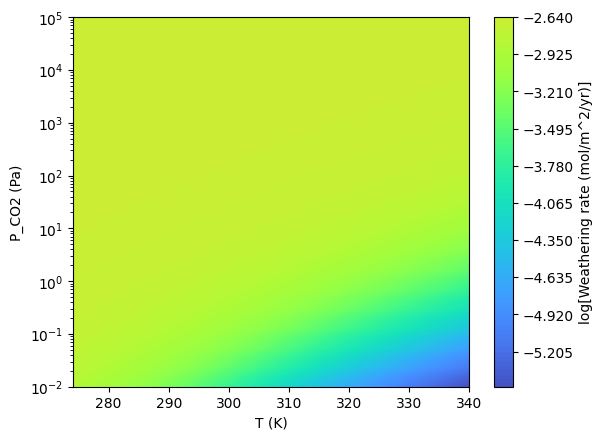

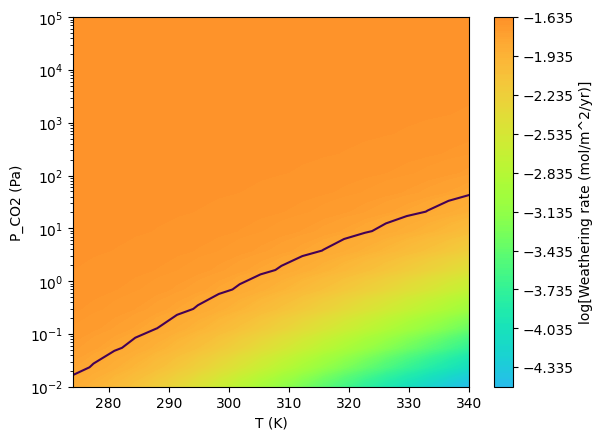

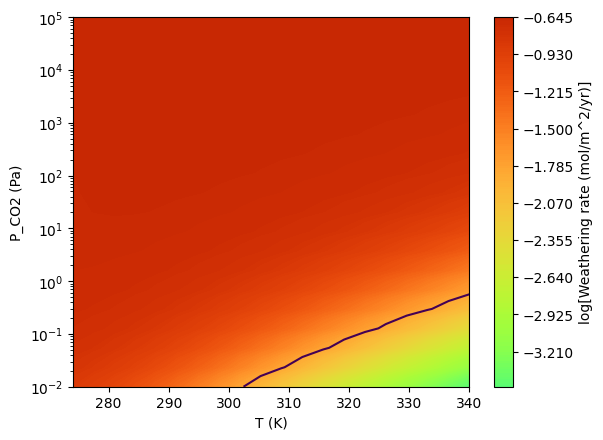

In [282]:
plt.contourf(T_range, pco2_range, np.log10(W_H21_1.T), 200, cmap=cmap, vmin=-6, vmax=0)
plt.colorbar(label='log[Weathering rate (mol/m^2/yr)]')
plt.contour(T_range, pco2_range, np.log10(W_H21_1.T), [np.log10(0.0147)])
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

plt.contourf(T_range, pco2_range, np.log10(W_H21_2.T), 200, cmap=cmap, vmin=-6, vmax=0)
plt.colorbar(label='log[Weathering rate (mol/m^2/yr)]')
plt.contour(T_range, pco2_range, np.log10(W_H21_2.T), [np.log10(0.0147)])
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

plt.contourf(T_range, pco2_range, np.log10(W_H21_3.T), 200, cmap=cmap, vmin=-6, vmax=0)
plt.colorbar(label='log[Weathering rate (mol/m^2/yr)]')
plt.contour(T_range, pco2_range, np.log10(W_H21_3.T), [np.log10(0.0147)])
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

In [276]:
t_rock_range = np.logspace(1, 8, num=20)
flow_rate_range = np.logspace(-3, 0, num=20)
W_H21 = np.zeros((20,20))

for i, t_rock in enumerate(t_rock_range):
    for j, flow_rate in enumerate(flow_rate_range):
        W_H21[i, j] = get_weathering_rate(1e6, 288, 280 * 1e-6, flow_rate, 100, t_rock)

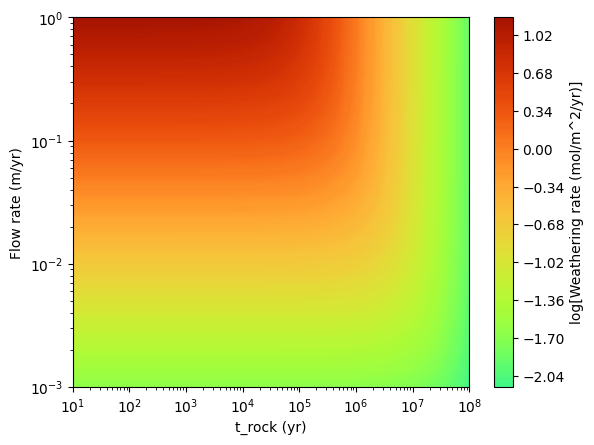

In [277]:
plt.contourf(t_rock_range, flow_rate_range, np.log10(W_H21.T), 200, cmap=cmap, vmin=vmin_log, vmax=vmax_log)
plt.colorbar(label='log[Weathering rate (mol/m^2/yr)]')
plt.xlabel('t_rock (yr)')
plt.ylabel('Flow rate (m/yr)')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [278]:
T_range = np.linspace(274, 340, num=20)
pco2_range = np.logspace(-1, 4, num=20)
W_H21_high_runoff = np.zeros((20,20))
W_H21_new_rocks = np.zeros((20,20))
W_H21_active = np.zeros((20,20))

for i, T in enumerate(T_range):
    for j, pco2 in enumerate(pco2_range):
        W_H21_high_runoff[i, j] = get_weathering_rate(1e6, T, pco2 / 1e5, 1, 100, 50e6)
        W_H21_new_rocks[i, j] = get_weathering_rate(1e6, T, pco2 / 1e5, 0.05, 100, 0)
        W_H21_active[i, j] = get_weathering_rate(1e6, T, pco2 / 1e5, 5, 1, 0)

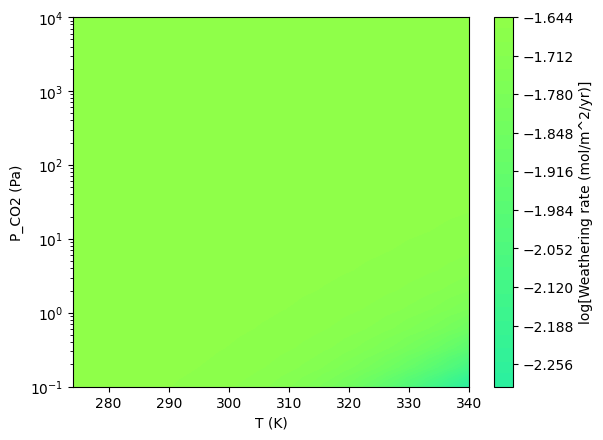

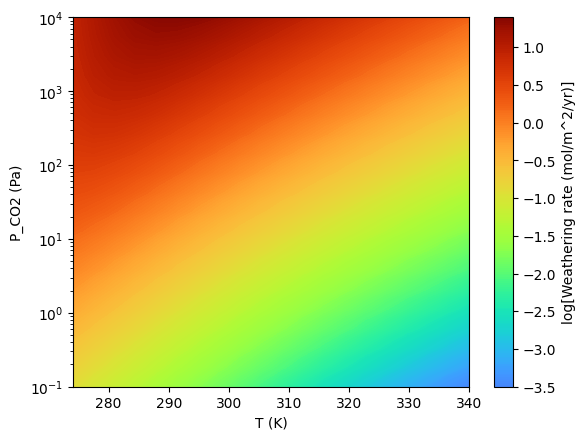

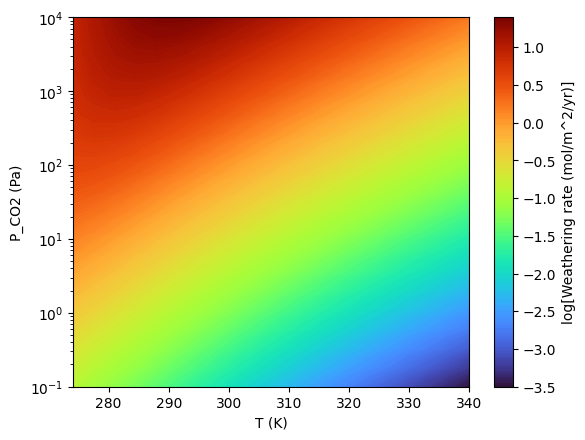

In [279]:
plt.contourf(T_range, pco2_range, np.log10(W_H21_high_runoff.T), 200, cmap=cmap, vmin=vmin_log, vmax=vmax_log)
plt.colorbar(label='log[Weathering rate (mol/m^2/yr)]')
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

plt.contourf(T_range, pco2_range, np.log10(W_H21_new_rocks.T), 200, cmap=cmap, vmin=vmin_log, vmax=vmax_log)
plt.colorbar(label='log[Weathering rate (mol/m^2/yr)]')
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()

plt.contourf(T_range, pco2_range, np.log10(W_H21_new_rocks.T), 200, cmap=cmap) #, vmin=vmin_log, vmax=vmax_log)
plt.colorbar(label='log[Weathering rate (mol/m^2/yr)]')
plt.xlabel('T (K)')
plt.ylabel('P_CO2 (Pa)')
plt.yscale('log')
plt.show()